In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


import tensorflow as tf
from keras.datasets import mnist
import seaborn as sns 


In [48]:
# Поколения
epochs = 3

# Определяем кол-во выборок
# Берем и обучет по 64 за выборку
batch_size = 64

# Adam стохастическая оптимизация
optimizer = 'adam'

In [59]:
def nor(x):
    #  Создаем 28 массивов по 28 подмассивовов по 1-му элементу
    a =  x.reshape(x.shape[0], 28, 28, 1) 
    # Нормализация
    return a / 255.0

def counter(model, x_test, y_test):
    l, acc = model.evaluate(x_test, y_test, verbose=2)
    print("Test loss:     ", l)
    print("Test accuracy: ", acc)


In [67]:
def builder():
    # Layers
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(1024, activation='relu'))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    return model

In [11]:
def build_confusion_matrix(model, x_test, y_test, labels):
  y_predict = model.predict(x_test)
  y_predict_classes = np.argmax(y_predict, axis=1)

  conf_matrix = confusion_matrix(y_test, y_predict_classes)
  fig, ax = plt.subplots(figsize=(15, 10))
  ax = sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax, cmap="Blues")
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

In [12]:
def build_image_matrix(x_test, y_test, labels):
  classes = 10
  objects = len(x_test)
  highest_scores = np.zeros(shape=(classes, classes))
  cf = np.zeros(shape=(classes, classes))
  y_predict = model.predict(x_test)

  # building confusion matrix and highest scores

  for i in range(objects):
    true_label = y_test[i]
    max_value = max(y_predict[i])
    index = np.argmax(y_predict[i])
    if max_value > highest_scores[true_label][index]:
      highest_scores[true_label][index] = max_value
      cf[true_label][index] = i

  # drawing image matrix

  for i in range(classes):
    f, ax = plt.subplots(1, classes, figsize=(28, 28))
    for j in range(classes):
      index = int(cf[i][j])
      if index == 0:
        ax[j].imshow(np.zeros(shape=(28, 28)), cmap='gray')
        continue
      sample = x_test[index]
      ax[j].imshow(sample.reshape(28, 28), cmap='gray')
      ax[j].set_title("True: {}\n Predict: {}".format(labels[i], labels[j]), fontsize=14)

In [51]:
(digits_x_train, digits_y_train), (digits_x_test, digits_y_test) = mnist.load_data()

fashion_x_train = nor(fashion_x_train)
fashion_x_test  = nor(fashion_x_test)

In [55]:
model = builder()
model.fit(digits_x_train, digits_y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/3
938/938 [==============================] - 288s 306ms/step - loss: 0.1189 - accuracy: 0.9685
Epoch 2/3
938/938 [==============================] - 264s 281ms/step - loss: 0.0424 - accuracy: 0.9876
Epoch 3/3
938/938 [==============================] - 262s 279ms/step - loss: 0.0330 - accuracy: 0.9907


In [60]:
counter(model, digits_x_test, digits_y_test)

313/313 - 11s - loss: 0.0434 - accuracy: 0.9896 - 11s/epoch - 34ms/step
Test loss:      0.04342623054981232
Test accuracy:  0.9896000027656555


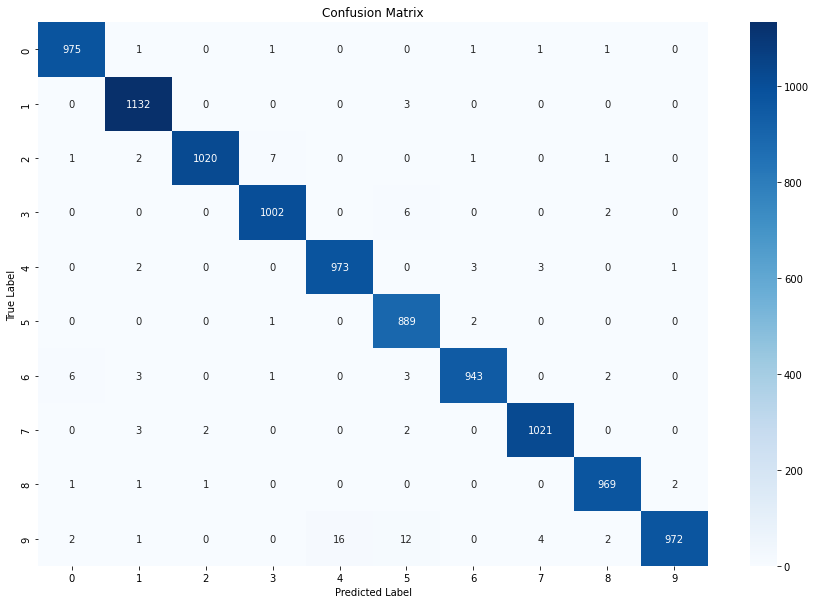

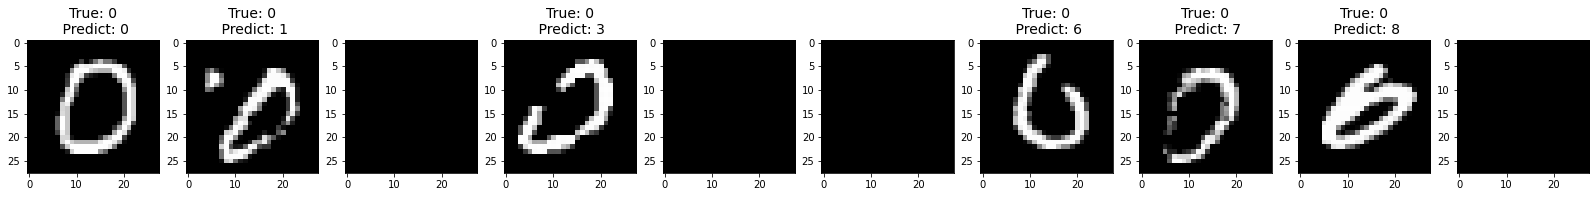

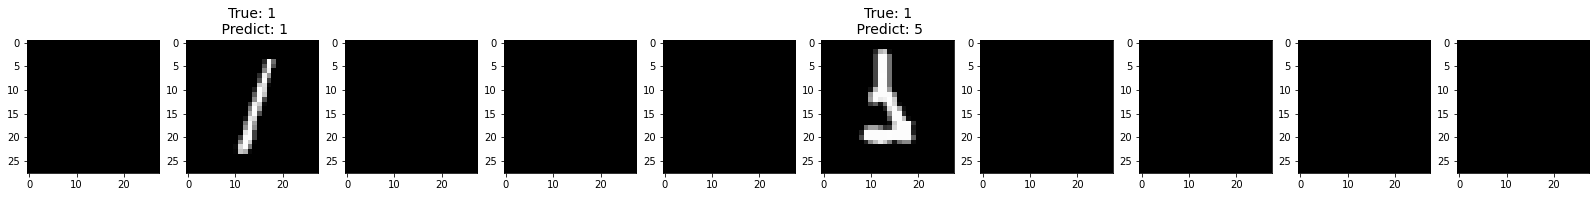

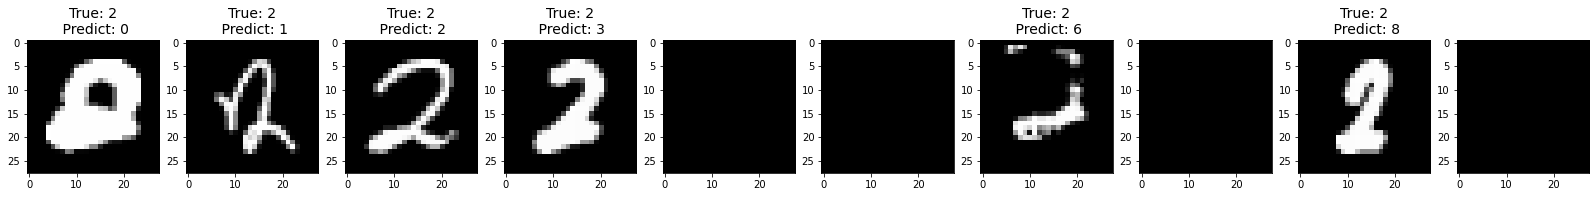

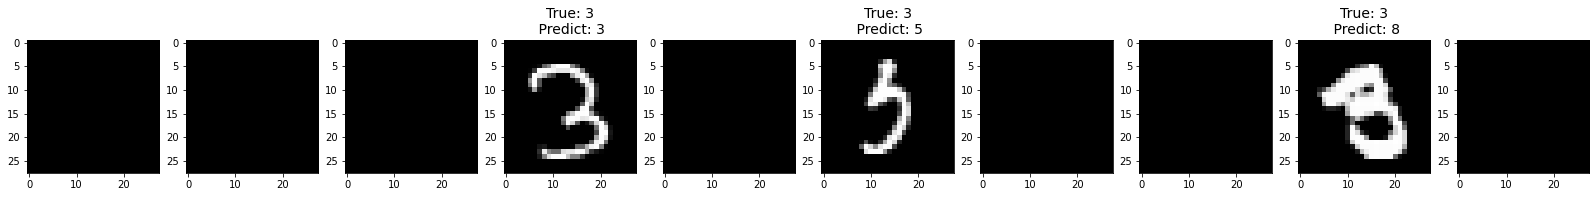

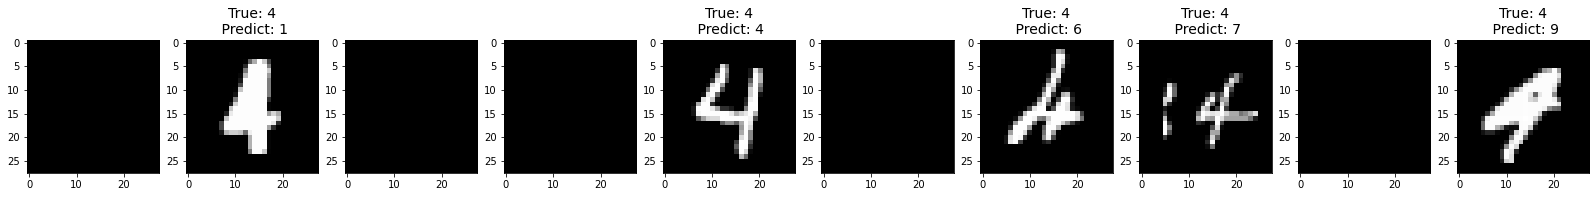

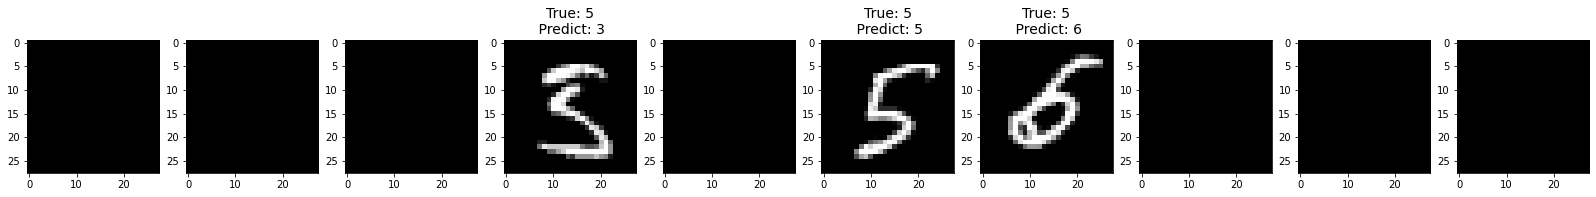

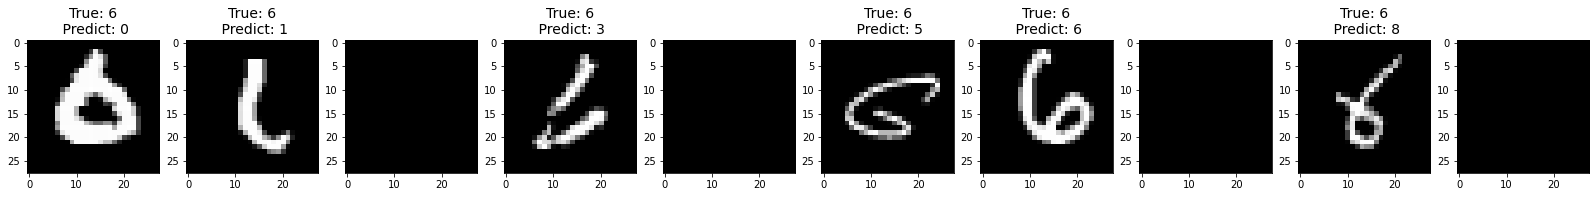

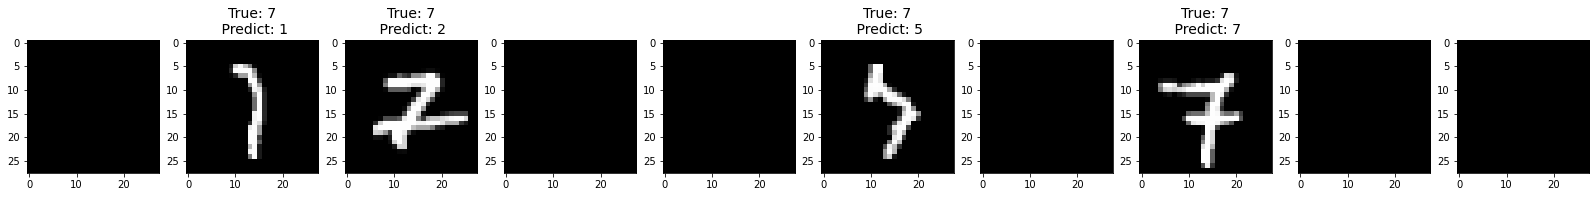

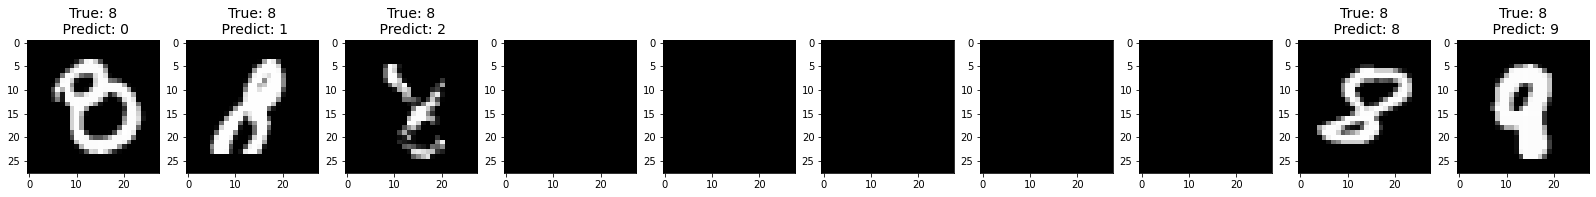

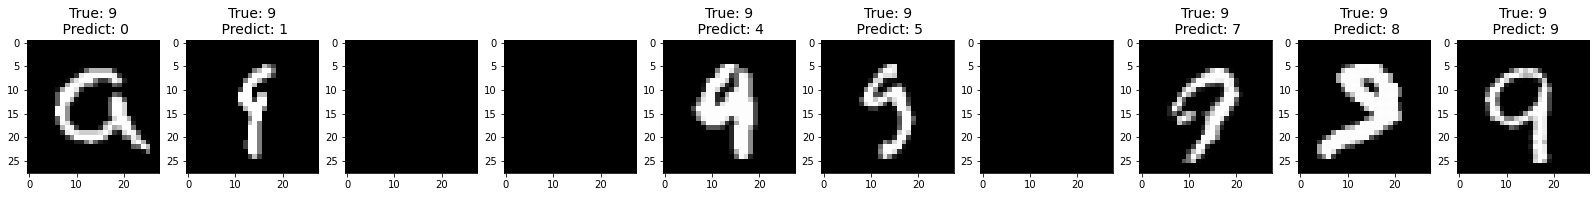

In [61]:
digits_labels = [i for i in range(10)]
build_confusion_matrix(model, digits_x_test, digits_y_test, digits_labels)
build_image_matrix(digits_x_test, digits_y_test, digits_labels)

In [45]:
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = tf.keras.datasets.fashion_mnist.load_data()

fashion_x_train = nor(fashion_x_train)
fashion_x_test  = nor(fashion_x_test)

In [66]:
model = builder()
model.fit(fashion_x_train, fashion_y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/3
938/938 [==============================] - 302s 316ms/step - loss: 0.4217 - accuracy: 0.8479
Epoch 2/3
938/938 [==============================] - 285s 304ms/step - loss: 0.2668 - accuracy: 0.9025
Epoch 3/3
938/938 [==============================] - 337s 359ms/step - loss: 0.2254 - accuracy: 0.9193


In [68]:
counter(model, fashion_x_test, fashion_y_test)

313/313 - 12s - loss: 0.3602 - accuracy: 0.8775 - 12s/epoch - 39ms/step
Test loss:      0.3601667582988739
Test accuracy:  0.8774999976158142


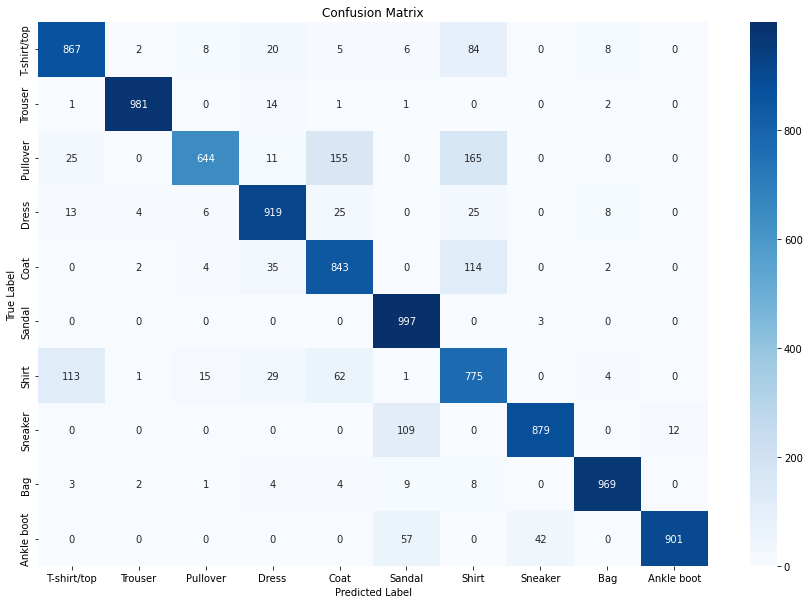

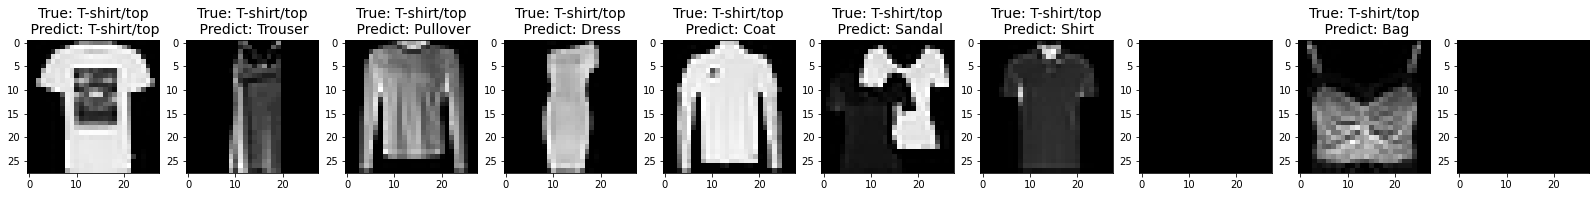

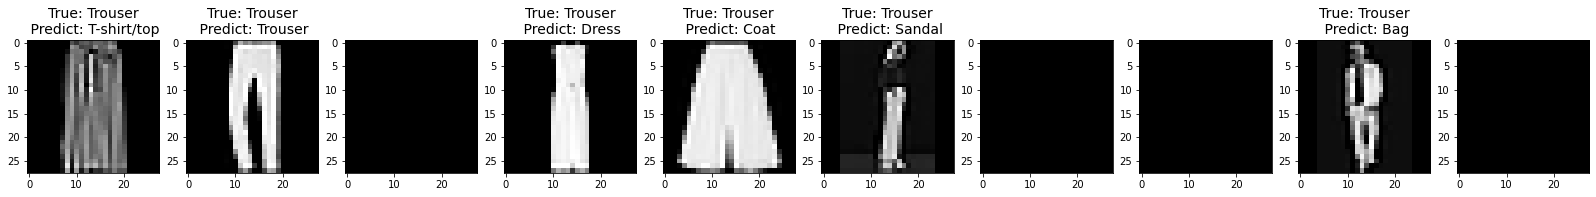

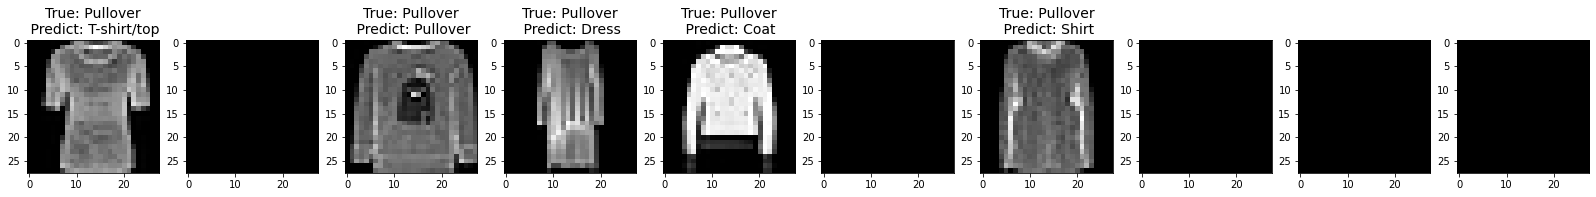

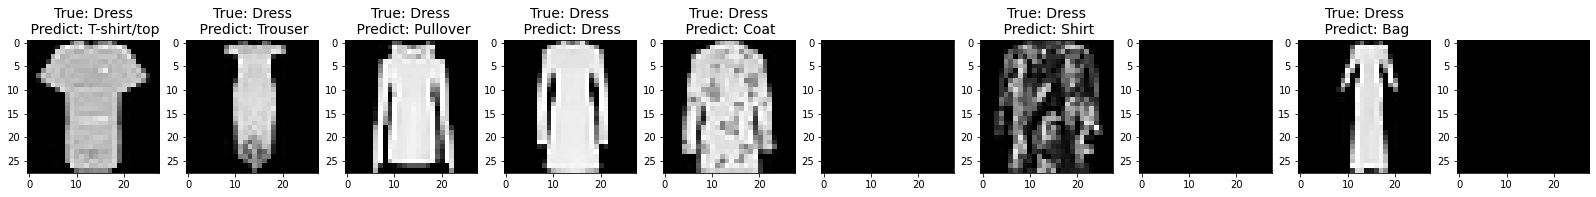

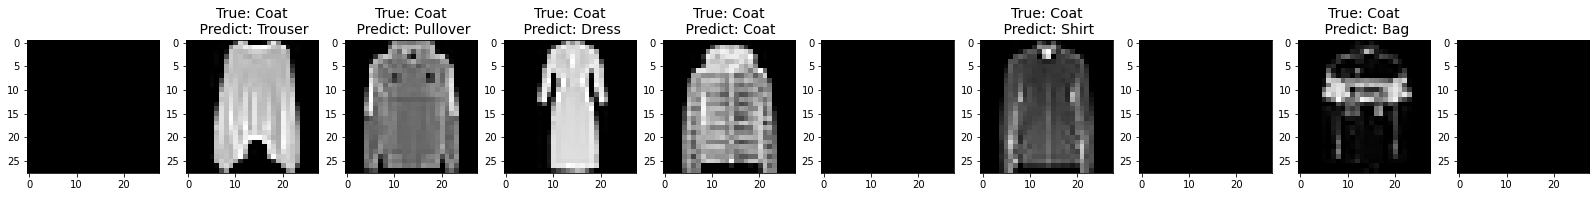

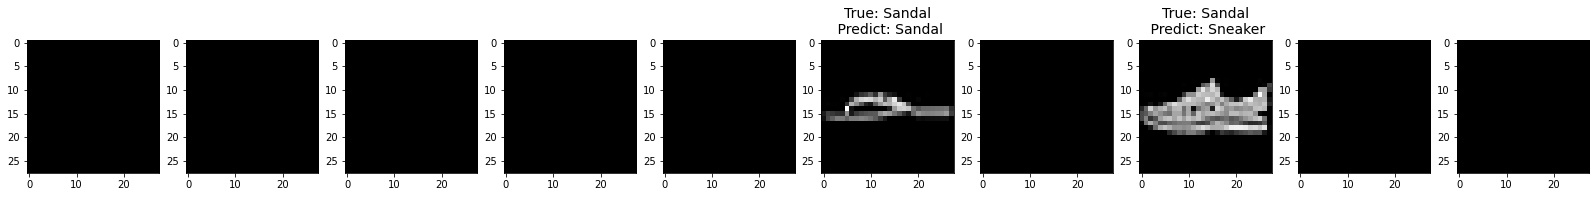

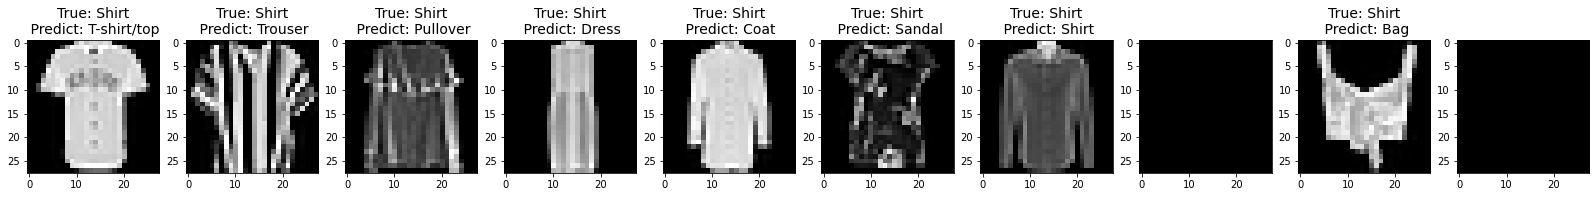

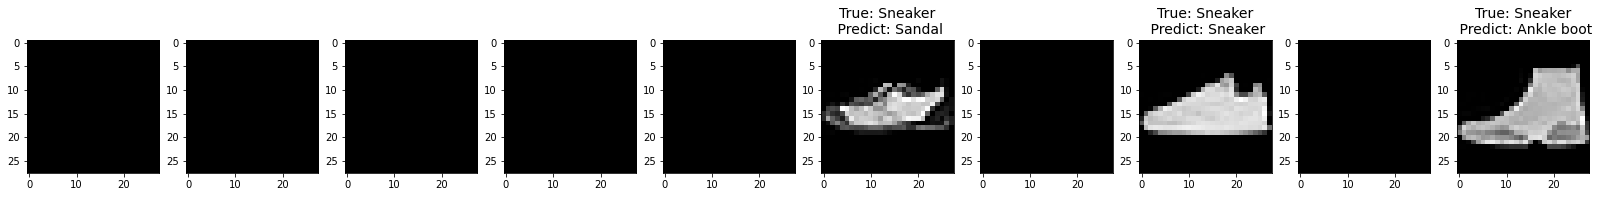

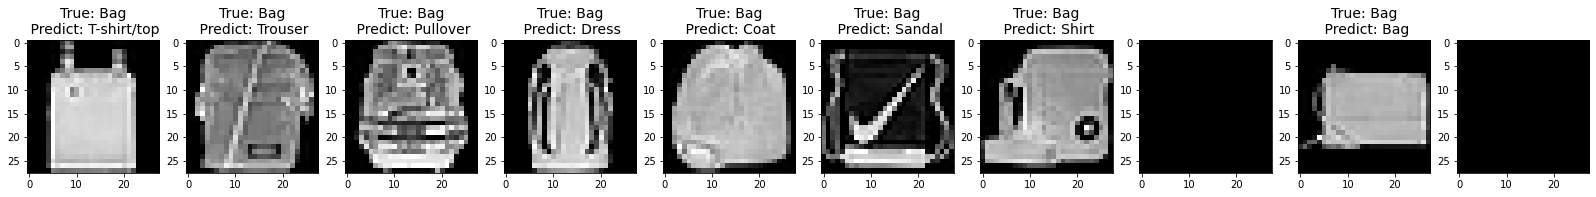

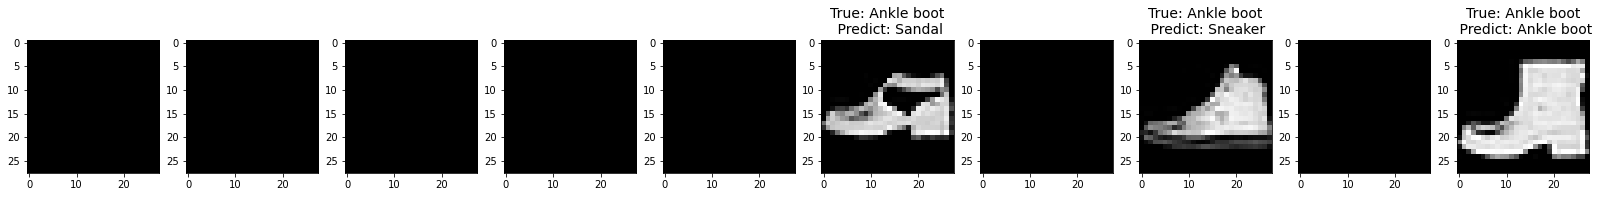

In [69]:
fashion_labels = ['T-shirt/top', 
                  'Trouser', 
                  'Pullover', 
                  'Dress', 
                  'Coat', 
                  'Sandal',
                  'Shirt',
                  'Sneaker',
                  'Bag',
                  'Ankle boot']
build_confusion_matrix(model, fashion_x_test, fashion_y_test, fashion_labels)
build_image_matrix(fashion_x_test, fashion_y_test, fashion_labels)